In [5]:
import datasets
from transformers import VisionEncoderDecoderModel, AutoTokenizer, ViTModel, ViTImageProcessor, ViTFeatureExtractor
from peft import PeftModel
import wandb
import cv2
from PIL import Image

In [6]:
tokenizer = AutoTokenizer.from_pretrained("gpt2")
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')

ViT =  ViTModel.from_pretrained("google/vit-base-patch16-224-in21k")
model = VisionEncoderDecoderModel.from_encoder_decoder_pretrained("google/vit-base-patch16-224-in21k", "gpt2")

Some weights of GPT2LMHeadModel were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.crossattention.c_attn.bias', 'h.0.crossattention.c_attn.weight', 'h.0.crossattention.c_proj.bias', 'h.0.crossattention.c_proj.weight', 'h.0.crossattention.q_attn.bias', 'h.0.crossattention.q_attn.weight', 'h.0.ln_cross_attn.bias', 'h.0.ln_cross_attn.weight', 'h.1.crossattention.c_attn.bias', 'h.1.crossattention.c_attn.weight', 'h.1.crossattention.c_proj.bias', 'h.1.crossattention.c_proj.weight', 'h.1.crossattention.q_attn.bias', 'h.1.crossattention.q_attn.weight', 'h.1.ln_cross_attn.bias', 'h.1.ln_cross_attn.weight', 'h.10.crossattention.c_attn.bias', 'h.10.crossattention.c_attn.weight', 'h.10.crossattention.c_proj.bias', 'h.10.crossattention.c_proj.weight', 'h.10.crossattention.q_attn.bias', 'h.10.crossattention.q_attn.weight', 'h.10.ln_cross_attn.bias', 'h.10.ln_cross_attn.weight', 'h.11.crossattention.c_attn.bias', 'h.11.crossattention.c_attn.weight', 'h.11.crossat

In [7]:
model.config.decoder_start_token_id = tokenizer.cls_token_id
model.config.pad_token_id = tokenizer.pad_token_id

model.config.vocab_size = model.config.decoder.vocab_size

model.config.eos_token_id = tokenizer.sep_token_id
model.config.decoder_start_token_id = tokenizer.bos_token_id
model.config.max_length = 128
model.config.early_stopping = True
model.config.no_repeat_ngram_size = 3
model.config.length_penalty = 2.0
model.config.num_beams = 4

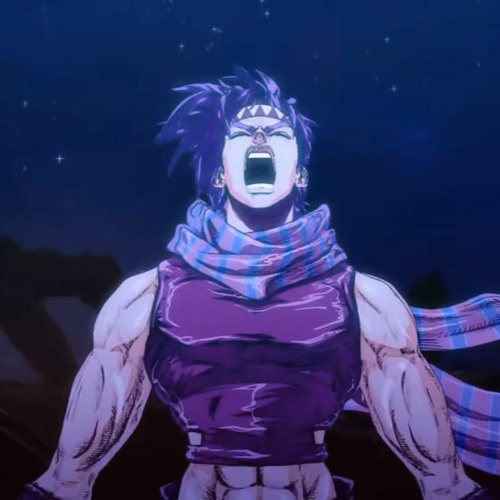

In [8]:
img = Image.open("jojo_image.jpg").convert("RGB")
img

In [9]:
feature_extractor(img, return_tensors="pt").pixel_values

tensor([[[[-0.9451, -0.9451, -0.9451,  ..., -0.9373, -0.9451, -0.9451],
          [-0.9451, -0.9451, -0.9451,  ..., -0.9373, -0.9451, -0.9451],
          [-0.9451, -0.9451, -0.9451,  ..., -0.9373, -0.9451, -0.9451],
          ...,
          [-0.8902, -0.8902, -0.8902,  ..., -0.8902, -0.8902, -0.8824],
          [-0.8980, -0.8980, -0.8902,  ..., -0.8902, -0.8824, -0.8902],
          [-0.8902, -0.8902, -0.8902,  ..., -0.8745, -0.8824, -0.8902]],

         [[-0.7020, -0.7020, -0.7020,  ..., -0.6863, -0.6941, -0.6941],
          [-0.7020, -0.7020, -0.7020,  ..., -0.6863, -0.6941, -0.6941],
          [-0.7020, -0.7020, -0.7020,  ..., -0.6863, -0.6941, -0.6941],
          ...,
          [-0.9765, -0.9765, -0.9765,  ..., -0.9765, -0.9765, -0.9686],
          [-0.9843, -0.9843, -0.9765,  ..., -0.9765, -0.9686, -0.9765],
          [-0.9765, -0.9765, -0.9765,  ..., -0.9608, -0.9686, -0.9765]],

         [[-0.2706, -0.2706, -0.2706,  ..., -0.2392, -0.2471, -0.2471],
          [-0.2706, -0.2706, -

In [10]:
output = model.generate(feature_extractor(img, return_tensors="pt").pixel_values, max_length=25, do_sample=True)
few_shot_model = VisionEncoderDecoderModel.from_pretrained('models/full_train')
# few_shot_model = PeftModel.from_pretrained(model, 'models/lora')
few_shot_output = few_shot_model.generate(feature_extractor(img, return_tensors="pt").pixel_values, max_length=25, do_sample=True)

c:\Users\achia\anaconda3\envs\llm\lib\site-packages\transformers\generation\utils.py:1197: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [11]:
token_ids = few_shot_output[0].tolist()

print(tokenizer.decode(token_ids))

<|endoftext|>A costume fashioned into a chicken suit and helmet.<|endoftext|>


In [12]:
token_ids = output[0].tolist()

print(tokenizer.decode(token_ids))

<|endoftext|>"We're not going to let that happen," he said. "We're going to have to look at how we
